  Using cached py-hanspell-1.1.tar.gz (3.0 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\revol\AppData\Local\Temp\pip-install-0g0cesx2\py-hanspell_0da0dbe06627498880a336c8cc1fe004\setup.py", line 2, in <module>
      from pip.req import parse_requirements
  ModuleNotFoundError: No module named 'pip.req'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [78]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('item_data.csv')
df.shape

(87398, 4)

In [79]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [80]:
df = df.drop_duplicates().reset_index().drop(['index'], axis = 1)

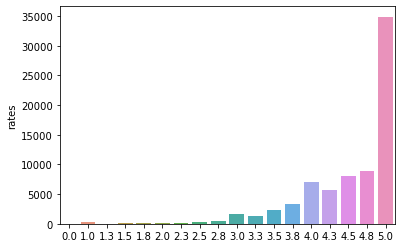

In [81]:
sns.barplot(x = df['rates'].value_counts().index, y = df['rates'].value_counts())

df['label'] = df['rates'].apply(lambda x : (1 if x >= 4 else 0))

In [82]:
df['label'].value_counts()

1    64407
0    10125
Name: label, dtype: int64

In [83]:
from hanspell import spell_checker
result = spell_checker.check(u'너네 집에 가도 되?')

for key, value in result.words.items():
    print(key, value)
    
# 0 : 문제 없음, 1 : 맞춤법 틀림, 2 : 띄어쓰기 틀림, 3 : 표준어 아님, 4 : 통계적 교정


너네 0
집에 0
가도 1
돼? 1


In [84]:
from hanspell import spell_checker

input = u'안녕 하세요. 저는 한국인 입니다.'
 
input_convert = input.replace('.','.#').split('#')
 
input_list =  [""]
print(input_convert)
for i in input_convert:
    print(i)
    if len(input_list[-1]) + len(i) < 500:
        input_list[-1] += i
    else:
        input_list.append(i)  
result = spell_checker.check(input_list)
 
print(result[0].result)

['안녕 하세요.', ' 저는 한국인 입니다.', '']
안녕 하세요.
 저는 한국인 입니다.

True


In [85]:
from hanspell.constants import CheckResult

print(CheckResult.PASSED)
print(CheckResult.WRONG_SPELLING)
print(CheckResult.WRONG_SPACING)

0
1
2


<AxesSubplot:>

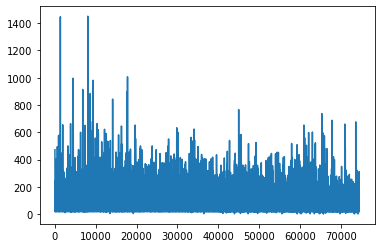

In [86]:
df['review'].astype(str).map(len).plot()

In [87]:
df['review']

0        와대박입니다 여러분 절대 혼자 조립하지 마세요 제가 나름 이런거 조립에는 곧잘하는데...
1        배송은 빨랐고 조립하는 게 되게 체계적으로 돼있어서 놀랐어요. 내부 공간은 넓은데 ...
2                           조립도 너무 쉽게했고 가격대비 괜찮은 것 같습니다! 🙂
3        음 겉보기만 이쁩니다 오늘의 집에서 구입한것중 가장 후회해요 이유는 서랍이 잘 안열...
4        예뻐요 조립이 첨엔 어려울까 싶어서 걱정했는데 하다보니 할만해요 ~ 크고 좋으네요 ...
                               ...                        
74527                             한쪽 면이 찌그러져 왔지만 그래도 좋았습니다
74528    그레이랑 화이트 컬러 샀는데 그레이가 생각보다 톤 다운된 그레이라 너무 이뻐요! 화...
74529                 잘쓰고 있어요. 오램만에 어플키니 리부 남겨라하네요 ㅋㅋㅋ 좋아요
74530    올려놓는 선반 부분이 힘이없다보니까 가벼운 물건 올려놓으면 지탱하는게 위태위태해보이...
74531    깔끔한 디자인으로 어디에 놓아도 이뻐요 근데 밑에 받침? 끼워넣는게 힘이 오지게 필...
Name: review, Length: 74532, dtype: object

In [89]:
from tqdm import tqdm
import time

text = df['review']

for i in tqdm(range(len(df['review'])), desc = 'tqdm example', mininterval = 0.01):
    try:
        inspect_text = df['review'][i]
        correct_text = spell_checker.check(inspect_text).checked
        df.loc[i, 'review'] = correct_text
    except:
        pass

tqdm example: 100%|████████████████████████████████████████████████████████████| 74532/74532 [1:58:56<00:00, 10.44it/s]


In [93]:
df.to_csv('item_data_fixspell.csv')